# Dimesnionality reduction on MNIST using PCA and t-sne

<b>About data</b>

 
The MNIST database of handwritten digits,has a training set of 70,000 examples . It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits

Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28∗28=784 dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.

the MNIST data points are embedded in 784-dimensional space

Objective of this problem is to visualizing high dimensional data and to build a classifier model

<b>Parameters</b>

Classes	10

Samples per class :-7000 samples per class

Samples total:-	70000

Dimensionality:-	784

Features:-	integers values from 0 to 255


In [1]:
%matplotlib inline
import os 
import pandas as pd  #data analysis
import numpy as np #scientific computation
import seaborn as sns #ploting tool
import matplotlib.pyplot as plt #ploting tool

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("C:/users/rock/Documents/train.csv")


In [3]:
data.head(5) #looking into first 5 rows of data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns #checking columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
data.shape

(42000, 785)

In [6]:
Y=data["label"] #saving label to a variable Y

In [7]:
X=data.drop("label",axis=1)#drop the label feature and stores data in variable X

In [8]:
Y.shape #42000 data poitns


(42000,)

In [9]:
X.shape 

(42000, 784)

In [10]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing the data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


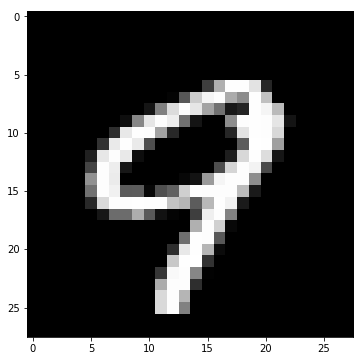

100    9
Name: label, dtype: int64


In [67]:
#display or plot a number 
plt.figure(figsize=(6,6))# figure size
idx=[100] #index value

grid=X.iloc[idx].as_matrix().reshape(28,28) #reshaping intp a matrix

plt.imshow(grid,interpolation="none",cmap="gray")
plt.show()


print(Y[idx])

# PCA for Visualization 

<b>what is PCA ?</b> 

PCA is extensionally used for dimensionality reduction for the visualization of high dimensional data. We do dimensionality reduction to convert the high d-dimensional dataset into n-dimensional data where n<d. i.e(2D and 3D)

<b>Why PCA ?</b>

Machine learning often demands we work with thousands of dimensions – or tens of thousands, or millions! Even very simple things become hard to understand when you do them in very high numbers of dimensions.

As is often the case when humans can’t directly do something, we’ve built tools to help us. one of the dimension reduction technique is calle as <b>     Principal component analysis.



PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features

<b>Limmitations</b>

-->PCA is not scalable we need to scale our data to guassian distribution 

-->IN PCA The directions with largest variance are assumed to be of the most interest

-->PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.


In [17]:
#data preprocesing and standarization 
from sklearn.preprocessing import StandardScaler
standarzied_data=StandardScaler().fit_transform(X) #we standardizing our data such that all values should fall under guassian distribution
print(standarzied_data.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [70]:
standarzied_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# importing PCA for visualization
from sklearn import decomposition
pca = decomposition.PCA()  # here decomopositionn compute eighhen values covariance matrix 
pca.n_components=2  #for 2D
pca_dt = pca.fit_transform(standarzied_data)

print("shape of pca data",pca_dt.shape)

shape of pca data (42000, 2)


here You can see that our data is converted into 2-dimensional data 

Now lets plot the data

In [85]:
pca_dt =np.vstack((pca_dt.T,Y)).T #stacking  data with labels for recognizing the numbers 

#creating a data data frame to put all this data to plot
pca_dataframe = pd.DataFrame(data=pca_dt,columns=("principal component_1","principal component_2","label"))

In [86]:
pca_dataframe.head()

,principal component_1,principal component_2,label
0,-5.140447,-5.226343,1.0
1,19.292300,6.032005,0.0
2,-7.644519,-1.705898,1.0
3,-0.474250,5.835447,4.0
4,26.559560,6.024465,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


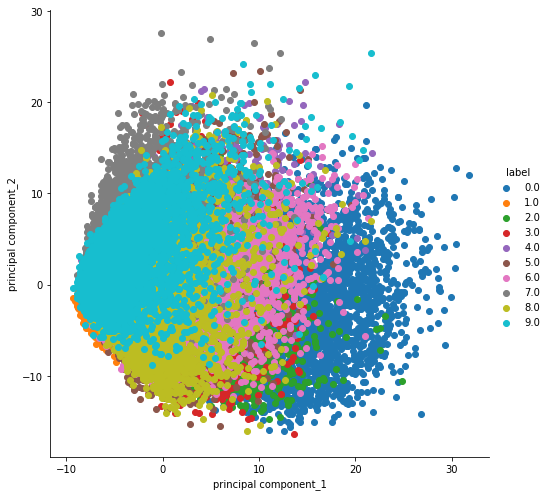

In [87]:
#plotting visualization of pca data
sns.FacetGrid(pca_dataframe,hue="label",size=7).map(plt.scatter,"principal component_1","principal component_2").add_legend()
plt.show()

<b>observations</b>

-->Here You can see by using PCA dimensionality reduction algorithm we can plot 784 dimensionality data in 2d space this the       great algoritm for dimensionality reduction

-->Here you see our numbers are separated not well separated. As you can see there is some overlapping of points 

-->to solve this we have another algorithm called <b>t-distributed Stochastic Neighborhood Embedding(t-SNE)



# T-SNE 

<b>What is t-SNE</b> 

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

-what is distribution?

Used to solve the crowding problem.

what is Neighborhood?

Points that are geometrically closed.

what is Embedding?

Finding low dimensional space for points given in higher dimensional space.

How does it do?


It preserves local structure of data.

Important parameters

perplexity: Number of points considered as neighbor geometrically.

n_iter: Number of iterations to be repeated

<b>Important this that to kept in mind while training t-SNE?</b>
 
-->Always run t-SNE with multiple perplexity values until it reaches to stabilized shape

-->if perplexity values  = number of data points it will become a mess 

-->perplexity should be less then < number of data points

-->Never run t-SNE with different perplexity and stepsize until shape stabilize 



NOTE:- t-sne is a iterative algoritm(stochastic algorithm). Eventually it wants to reach a stage that clusters are no long moving.it tires to find embeddings in each iteration

In [ ]:
#due to time complexity im not using all the data points to visualize 
#here im only considering 1500 k standardized data points to my algorithm 

In [ ]:
# pick  first 15k data-points to work on time effficiency

labels=l.head(15000)
data=d.head(15000)
print(data.shape)

In [57]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#piciking 15K data points 45K as TNSE takes a lot of time for 45K its time taking
standardized_data=StandardScaler().fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
standardized_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


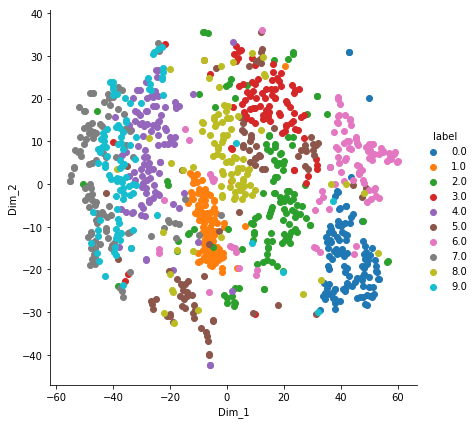

In [59]:

# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
                     

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


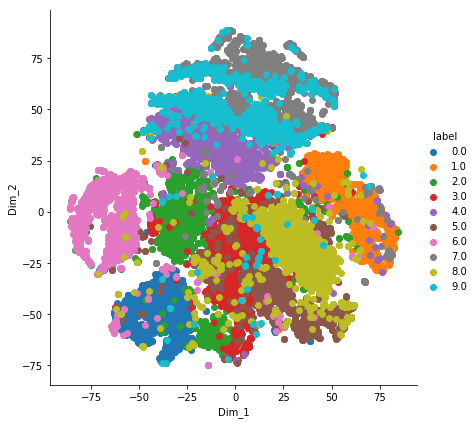

In [62]:

# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:15000,:]
labels_1000 = labels[0:15000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
                     

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


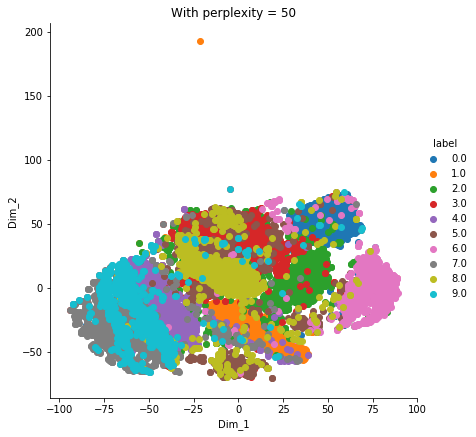

In [63]:
model = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 100')
plt.show()

<b>Observations:-</b>

YOU can visually see that our t-sne algorithm clustered digits well.it performs better than PCA it embeds all the neighboring of a particular digit very well.

You can use this smae code for every project by just changing the parameters. 

<b>NOTE</b> 

t-sne is a iterative algorithm it takes lot of time to training so here in my notebok i just used only 15K points.



<b>Conclusion</b>

-->Dimensionality reduction is a well developed area, and we’re only scratching the surface here. There are hundreds of techniques and variants that are unmentioned in my notebook.

-->There’s no way to map high-dimensional data into low dimensions and preserve all the structure.

-->Where PCA tries to preserve global structure and  t-SNE tries to preserve neighborhood structure


# Using PCA as Optimized Algorithm 

<b>Use of using PCA as optimized algorithm</b>

-->you can speed up the fitting of a machine learning algorithm by changing the optimization algorithm. 

-->If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice.

-->If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff.

Here we reducing dimensions to speed up our model  like if we have dimesions of D we trying to reducing it into D' such that 
(D'<D)

Here rule is that we have reduce our data in such way that 95% variance is explained by projecting D' points

<b>Objective of is PCA maximize the variance of the points  


how to select perefect dimesions that our max vairance should be retained?

its done by dividing the D'eigen values with sum of all the eigen values

this tells the total variance is explained by projecting D'



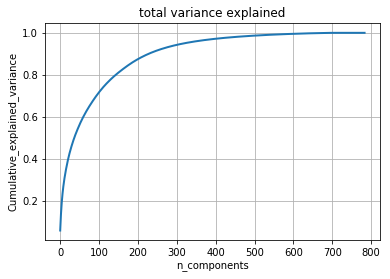

In [44]:

pca.n_components = 784
pca_data = pca.fit_transform(standarzied_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA 
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title("total variance explained")
plt.show()


<b> observations:-
    
If we take 340-dimensions, approx. 95% of variance is explained.

you can observe the use optimization algorithms. such that it reduces our 784 dimensions into 340 dimensions

BY this our algorithm will accquire more speed 


# LogisticRegression ON MNIST

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

StandarX =sc_X.fit_transform(X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
X_train,x_test,Y_train,y_test = train_test_split(StandarX,Y,test_size=0.3,random_state=30)

In [13]:
X_train.shape

(29400, 784)

In [14]:
Y_train.shape

(29400,)

In [15]:
x_test.shape

(12600, 784)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(0.96) # here we have achieveing 96% of variance by 343 dimesnions
pca.fit_transform(X_train)


pca.n_components_

343

In [17]:
pca.fit_transform(x_test)


array([[-2.54631975e+00,  3.44001882e-01,  7.79196459e+00, ...,
        -3.55117785e-01, -4.07648429e-01,  1.34779722e-01],
       [-7.64038944e+00, -4.02670608e-01,  2.48027928e+00, ...,
         1.79981703e-01, -1.17963780e-01, -1.87975866e-02],
       [-6.77759967e+00, -3.50935358e-01, -5.48520023e+00, ...,
         1.58844852e-01,  1.01124681e-01,  3.35630749e-01],
       ...,
       [-6.94945308e+00,  3.13256900e-02,  1.61173642e+00, ...,
        -3.55291359e-01, -3.68754828e-01, -4.00232846e-03],
       [-4.43445023e+00,  3.43545044e+00, -5.73633598e+00, ...,
        -7.44859176e-02, -5.18254921e-01,  4.15945867e-01],
       [-7.93570518e+00, -3.09010764e+00,  4.49988089e+00, ...,
         4.50307593e-02, -2.08648780e-01,  5.29996611e-02]])

In [18]:
#applying logistic regresion 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
predc = model.predict(x_test) 

In [22]:
from sklearn import metrics
print("accuracy of the model ",metrics.accuracy_score(y_test,predc))


accuracy of the model  0.9103174603174603


<b>well we have achieved a accuracy of 91% by logisticregression

In [24]:
k_range = range(1, 30,2)

scores = []
# We append the scores in the dictionary
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predic = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,predic))
    

print(scores)

[0.9394444444444444, 0.9407936507936508, 0.9425396825396826, 0.94, 0.9395238095238095, 0.9361904761904762, 0.9346825396825397, 0.9321428571428572, 0.930952380952381, 0.928968253968254, 0.9283333333333333, 0.9257936507936508, 0.9241269841269841, 0.9224603174603174, 0.9215873015873016]


In [31]:
print("max accuracy",max(scores))

max accuracy 0.9425396825396826


Text(0, 0.5, 'Testing Accuracy')

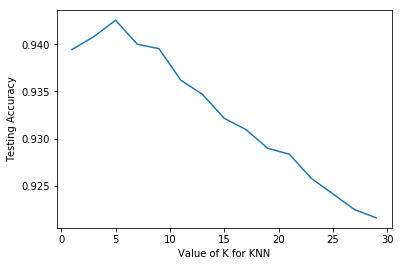

In [32]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


<b>important note:</b>

In this python notebook i have trained and tested my model only on train dataset i didnt use test data set. here trained my model only to show process 

if you want to use entire data set :

-->dont split the train data set
-->standardized data both and test and train data coz for pca scaling

--->Try to implement cross validation code follows:-

from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 3)

scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print(score.mean())

Due to time complexity i didnt use my entire data 


    